<a href="https://colab.research.google.com/github/RanxduG/Sri-Lanka-Formaldehyde-Level-Analysis/blob/main/Data_Engineering_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Colombo_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Full/colombo_joined_data.csv')
Kandy_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Full/kandy_joined_data.csv')
Monaragala_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Full/monaragala_joined_data.csv')
Nuwara_Eliye_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Full/nuwara_joined_data.csv')
Kurunegala_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Full/kurunegala_joined_data.csv')
Matara_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Full/matara_joined_data.csv')
Jaffna_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Full/jaffna_joined_data.csv')

In [5]:
Colombo_data.set_index('date', inplace=True)

KeyError: "None of ['date'] are in the columns"

In [6]:
Colombo_data.head()

,T2M,TS,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,HCHO reading,Location,Current Date,Next Date,month
date,,,,,,,,,,,,,,,
2019-01-01,24.80,25.29,15.62,80.00,0.12,100.03,6.29,35.50,8.16,37.00,0.000197,Colombo Proper,2019-01-01,2019-01-02,2019-01
2019-01-02,24.39,25.01,15.14,79.50,0.02,100.02,5.64,33.44,7.34,35.31,0.000263,Colombo Proper,2019-01-02,2019-01-03,2019-01
2019-01-03,24.17,24.73,14.77,78.50,0.01,100.06,6.15,30.62,7.91,32.06,0.000099,Colombo Proper,2019-01-03,2019-01-04,2019-01
2019-01-04,24.04,24.57,14.47,77.62,0.00,100.01,5.64,34.25,7.43,36.19,0.000210,Colombo Proper,2019-01-04,2019-01-05,2019-01
2019-01-05,24.87,25.33,16.05,81.50,0.03,99.88,5.47,71.81,7.20,44.19,0.000179,Colombo Proper,2019-01-05,2019-01-06,2019-01


In [7]:
Colombo_data.describe()

,T2M,TS,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,HCHO reading
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,26.586698,26.974107,18.360975,83.770268,6.886325,99.564901,4.230159,189.819874,5.462788,188.375608,0.000156
std,0.894135,1.019659,1.269119,4.813949,9.055817,0.148006,1.606205,81.079126,2.120336,81.767163,0.000085
min,23.290000,23.760000,13.610000,59.750000,0.000000,99.090000,0.880000,12.810000,1.230000,13.690000,0.000000
25%,26.020000,26.340000,17.760000,81.205000,1.002500,99.460000,2.782500,138.470000,3.530000,133.922500,0.000098
50%,26.530000,26.820000,18.550000,84.880000,3.690000,99.560000,4.380000,225.720000,5.700000,225.410000,0.000144
75%,27.190000,27.527500,19.230000,87.310000,9.137500,99.660000,5.480000,247.380000,7.150000,247.310000,0.000207
max,29.340000,30.760000,21.420000,92.500000,83.860000,100.080000,9.330000,336.120000,11.840000,336.380000,0.000478


In [14]:
Colombo_data.rename(columns={'HCHO reading': 'HCHO_reading'}, inplace=True)

In [9]:
features_to_remove = ['Location',	'Current Date', 	'Next Date', 	'month']
Colombo_data = Colombo_data.drop(features_to_remove, axis=1)

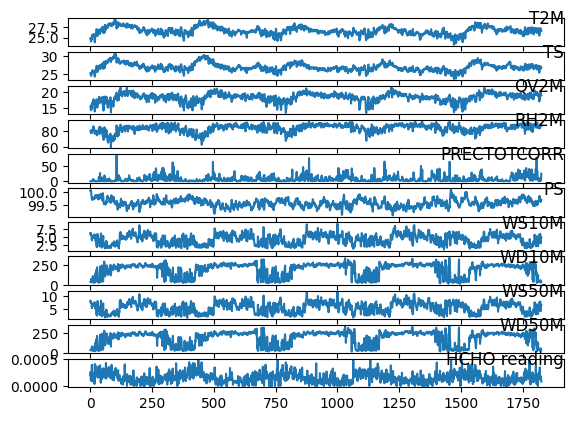

In [11]:
from matplotlib import pyplot as plt

values = Colombo_data.values
groups = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(Colombo_data.columns[group], y=0.5, loc='right')
    i += 1


plt.show()

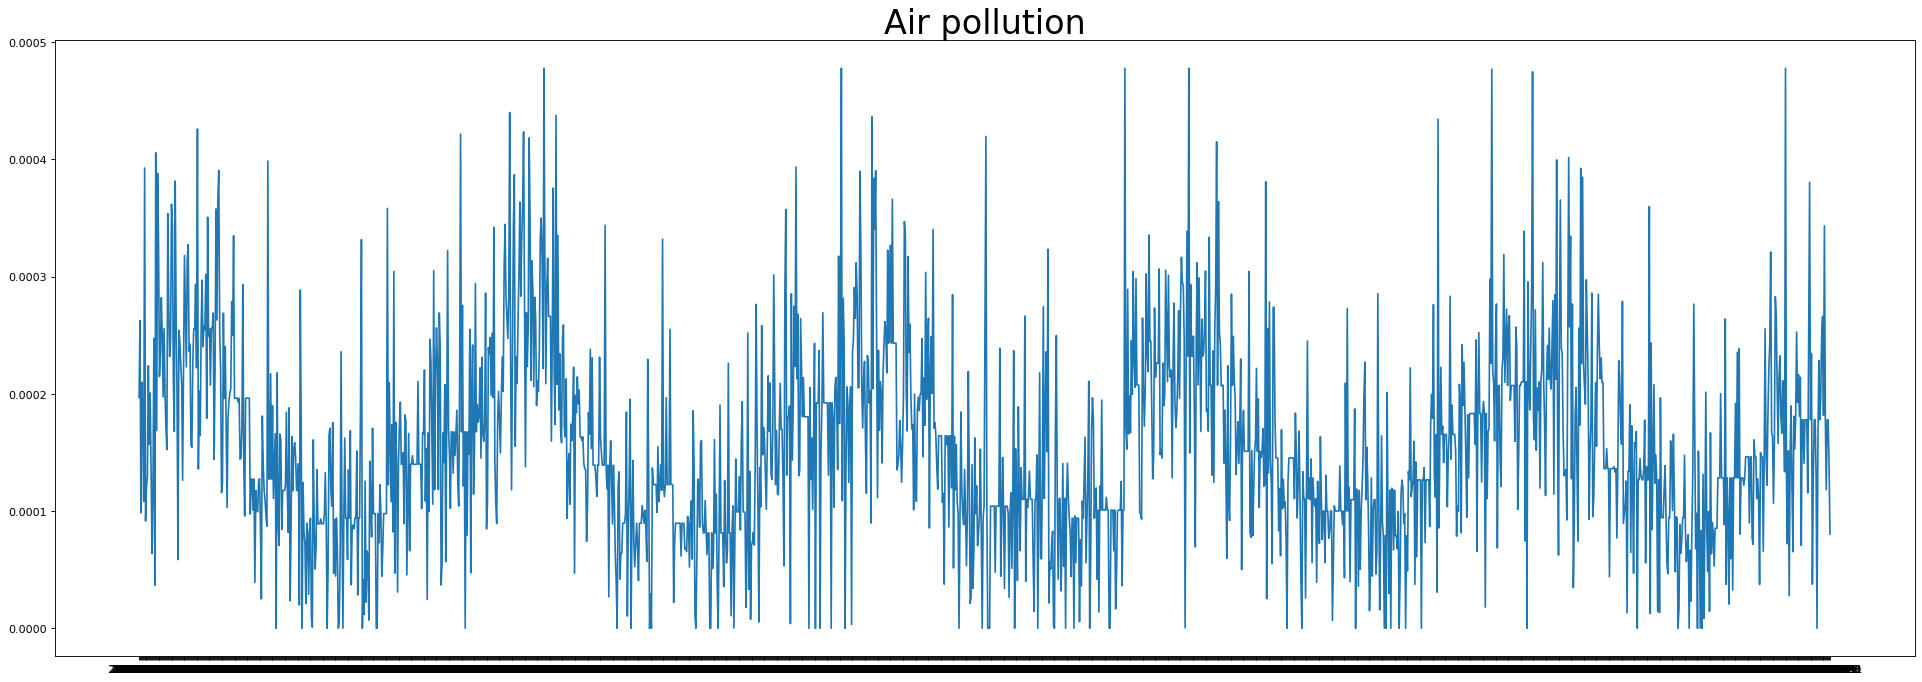

In [15]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Air pollution', fontsize=30)

plt.plot(Colombo_data.HCHO_reading)

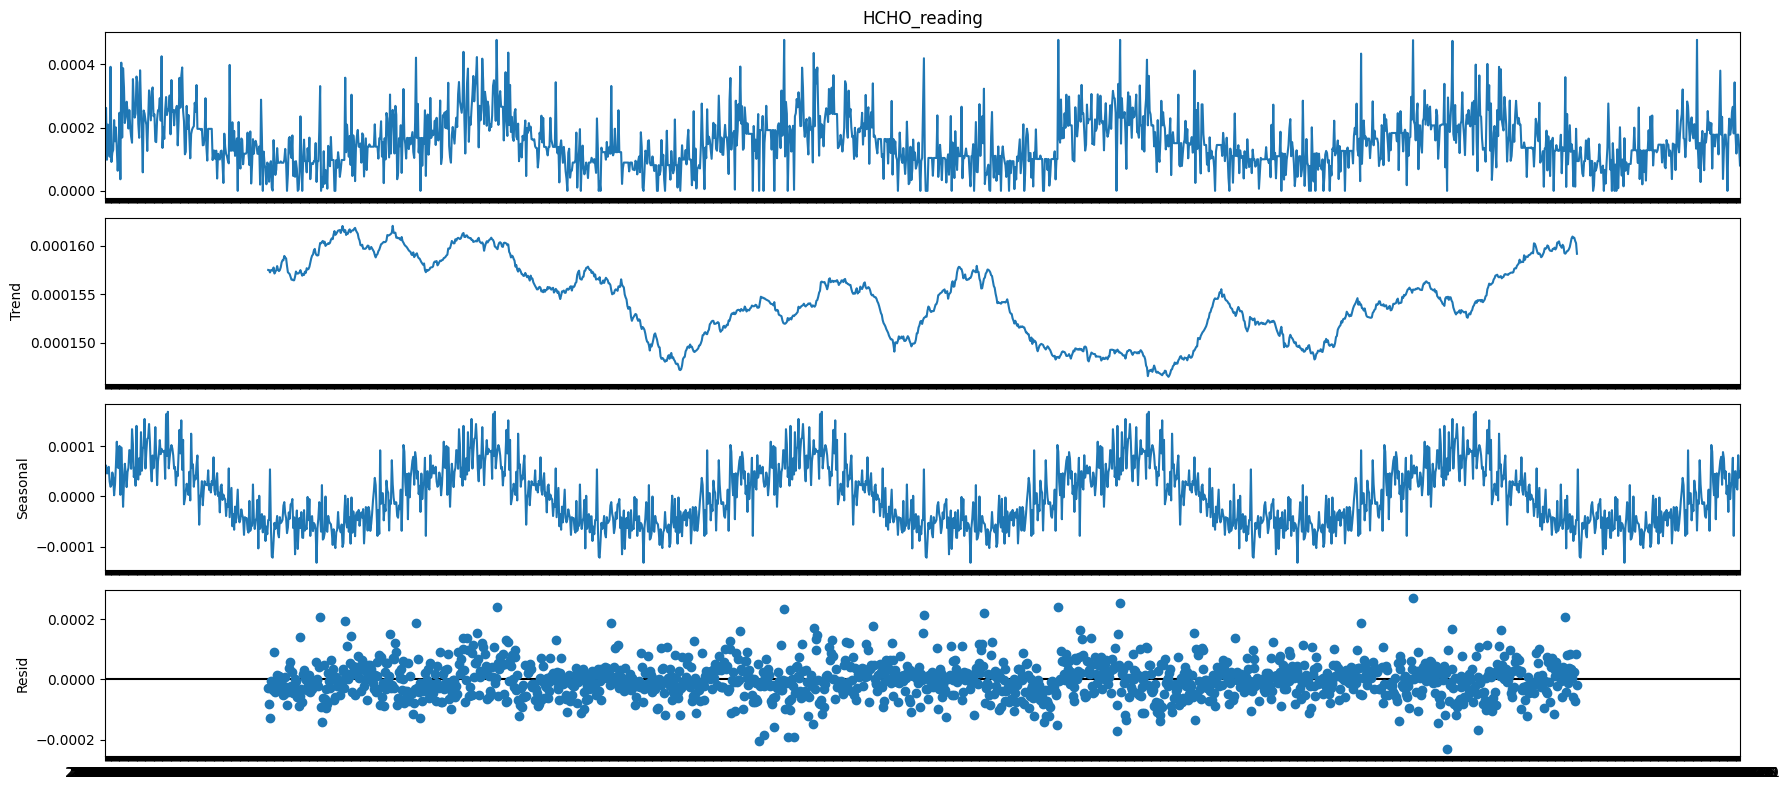

<Figure size 4000x1600 with 0 Axes>

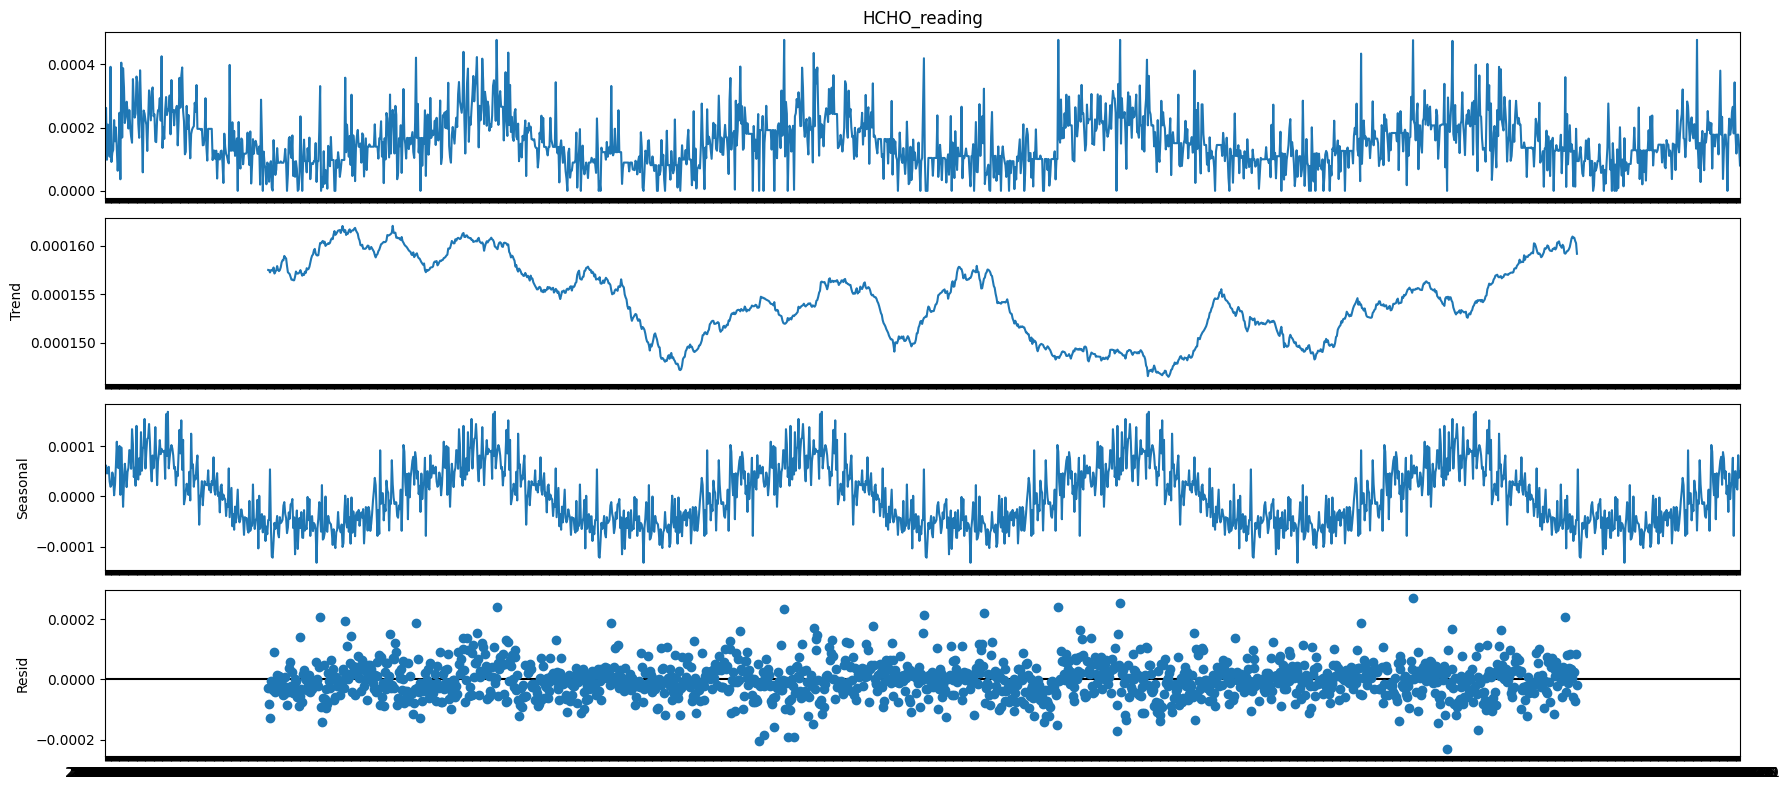

In [17]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
series = Colombo_data.HCHO_reading
result = seasonal_decompose(series, model='additive', period=365)
result.plot()

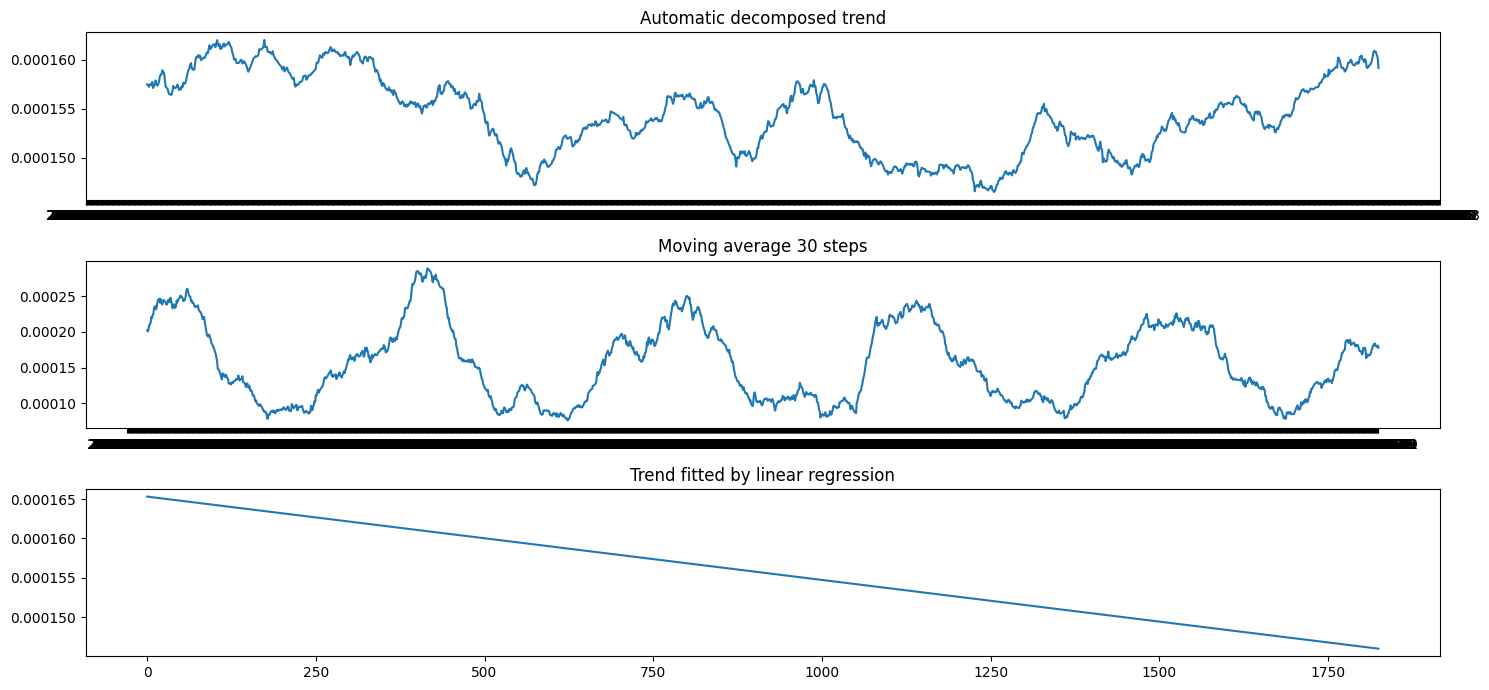

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression

fig = plt.figure(figsize=(15, 7))
layout = (3, 2)
pm_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
mv_ax = plt.subplot2grid(layout, (1, 0), colspan=2)
fit_ax = plt.subplot2grid(layout, (2, 0), colspan=2)

pm_ax.plot(result.trend)
pm_ax.set_title("Automatic decomposed trend")

mm = Colombo_data.HCHO_reading.rolling(30).mean()
mv_ax.plot(mm)
mv_ax.set_title("Moving average 30 steps")


X = [i for i in range(0, len(Colombo_data.HCHO_reading))]
X = np.reshape(X, (len(X), 1))
y = Colombo_data.HCHO_reading.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
fit_ax.plot(trend)
fit_ax.set_title("Trend fitted by linear regression")

plt.tight_layout()